<a href="https://colab.research.google.com/github/safrilth/datalatih/blob/master/Fire_Forest_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mission Objective
1. Input Data -> Data Frame -> Data Structure -> Eksploratory Analysis
2. Normalisasi -> Transformasi Data -> Data Frame Updated
3. Korelasi Parameter Input dan Output-> dipilih parameter yang signifikan
4. Cluster berdasar parameter yang signifikan
5. Visualisasi (heat map)

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Objektive 1:
Input Data Frame dari dataset yang telah tersedia

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/safrilth/datalatih/master/forestfires.csv')
print(data.head())
print(data.info())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


Objective 1: Data Structure Analysis
  1. Data Head
  2. Data Shape
  3. Data Columns Name
  4. Data Kosong

In [0]:
#Data Head
print('\nData Head : \n',data.head())
print('\n(Row #, Column #): \n', data.shape)
print('\nColumn names: \n', data.columns)
print('\nJumlah Data Kosong :\n', data.isnull().sum())


Data Head : 
    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

(Row #, Column #): 
 (517, 13)

Column names: 
 Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Jumlah Data Kosong :
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


1. Data Head -> Telah sesuai dengan file
2. Terdapat 517 row dan 13 columns, sesuai dengan syarat project (min 500 row, 5 columns)
3. Jumlah data kosong = 0, sehingga tidak perlu melakukan preparasi data terkait missing values
4. Nama kolom = ada 13, bisa dibagi menjadi beberapa jenis variabel,

Variabel Time = 'month', 'day'

Variabel Space = 'X', 'Y'

Variabel Input = 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain'

Variabel Output = 'area'

Objective 1 : Melakukan Ekspoloratory Analysis pada variabel Input dan Output

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


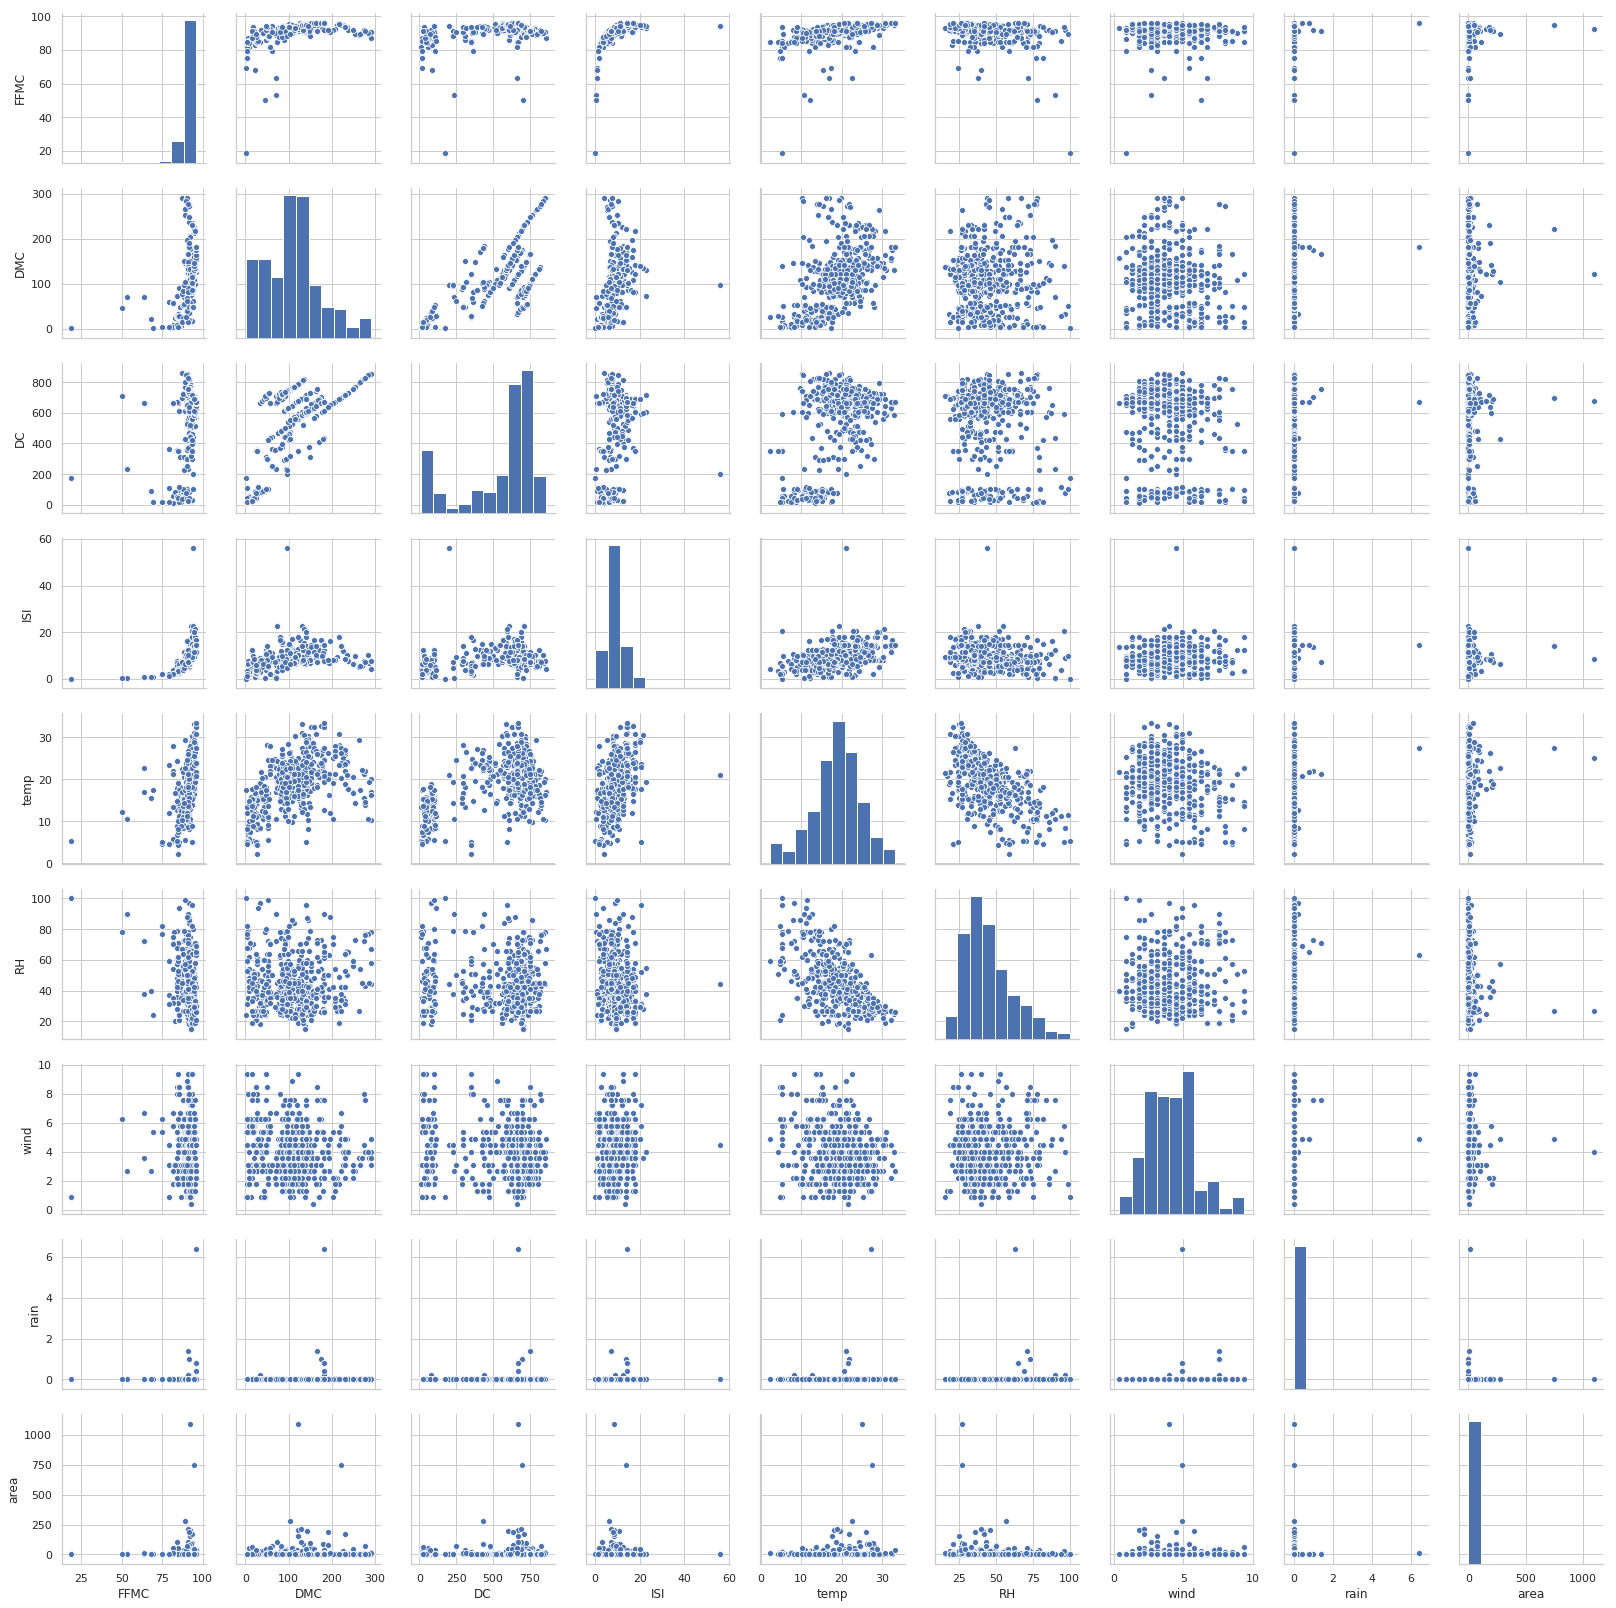

In [0]:
data_expl = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

sns.set(style='whitegrid', context='notebook')
cols = data_expl.columns
sns.pairplot(data[cols], size=2.5)
plt.show()

Hasil Eksploratory Analysis :
1. Variabel Output(Area) ialah salah satu variabel yang paling penting, namun jika dilihat dari bentuk histogramnya, belum membentuk suatu kurva normal, sehingga perlu dinormalisasi

In [0]:
data_expl.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Objective 2 : Normalisasi data dengan Data Transformation
1. Data Area (Deskripsi, Histogram sebelum normalisasi, Histogram Setelah Normalisasi, Assign Hasil Normalisasi ke dataframe)

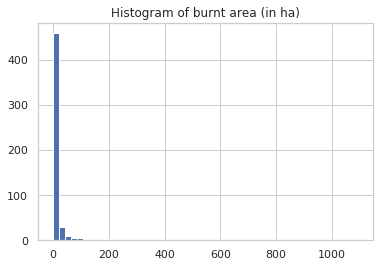

In [0]:
#sebelum ditransformasi
data['area'].hist(bins=50)
plt.title('Histogram of burnt area (in ha)')
plt.show()

Histogram diatas belum membentuk kurva normal, sehingga perlu dinormalisasi

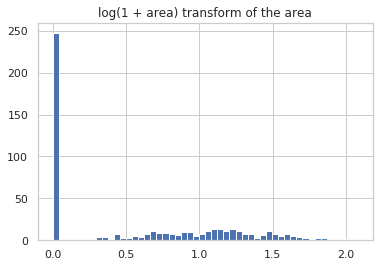

In [0]:
#setelah ditransformasi
area_transform = np.log(np.log(1 + data['area'])+1)
area_transform.hist(bins=50)
plt.title('log(1 + area) transform of the area')
plt.show()

Histogram setelah transformasi maka bebentuk lebih menyerupai kurva normal, lalu di assign ke dataframe, dan dicek lagi menggunakan eksploratory analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


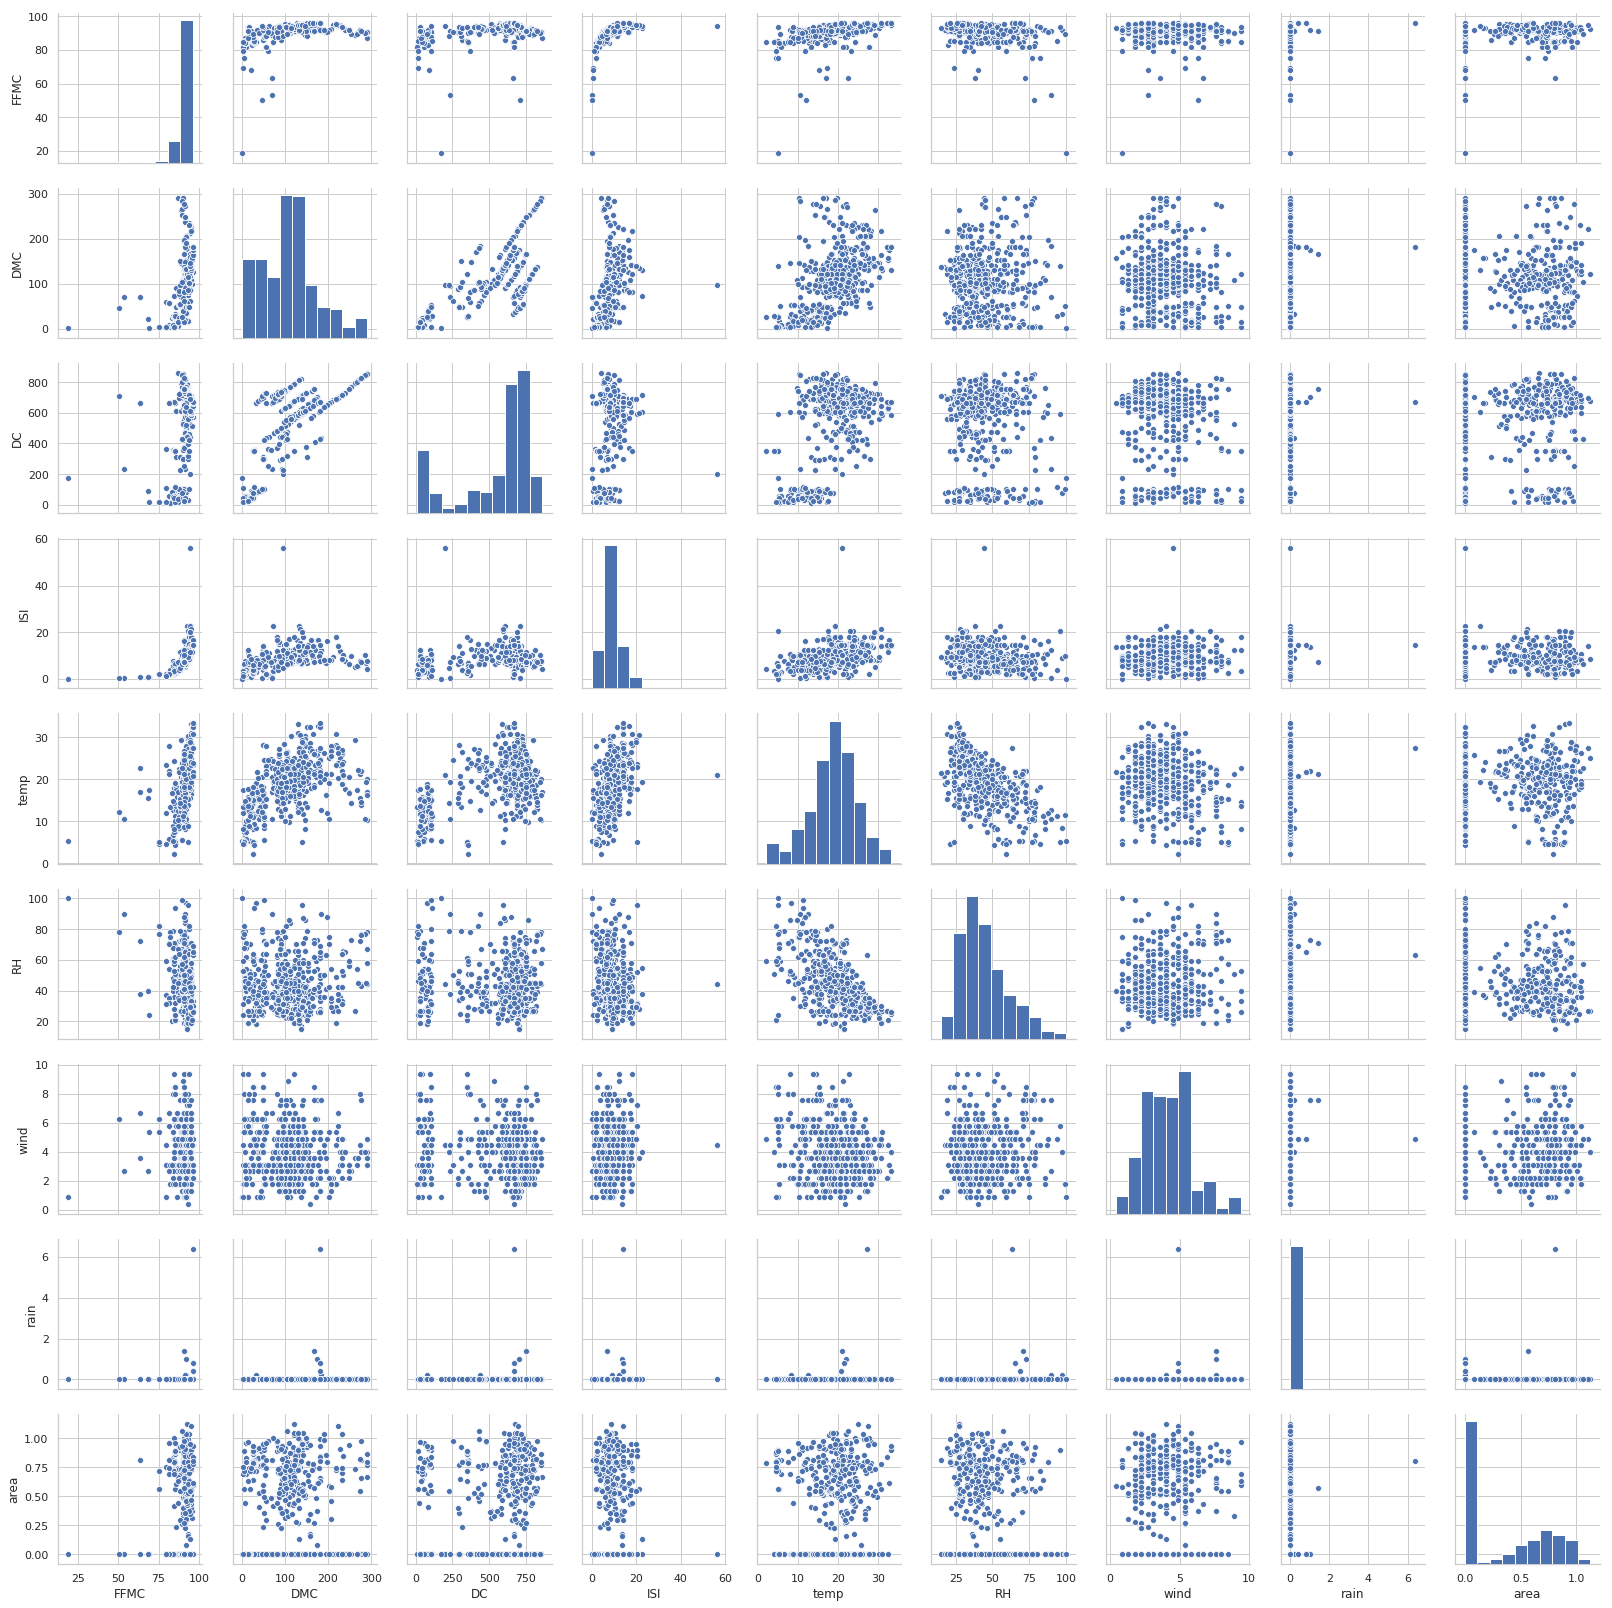

In [0]:
#Assign data area yang telah ditransformasi ke dataframe
data = pd.read_csv('https://raw.githubusercontent.com/safrilth/datalatih/master/forestfires.csv')
data['area'] = np.log(1 + np.log(1 + np.log(1 + data['area'])))

data_norm = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

sns.set(style='whitegrid', context='notebook')
cols = data_norm.columns
sns.pairplot(data_norm[cols], size=2.5)
plt.show()

Kenormalan data pada variabel area mulai terlihat menyerupai normal dibanding sebelumnya. untuk variabel input dibiarkan natural karena nanti akan diseleksi, variabel mana saja yang signifikan, menggunakan korelasi

Objective 3 : Mengkorelasi Variabel Input dan Output, lalu memilih variabel yang signifikan

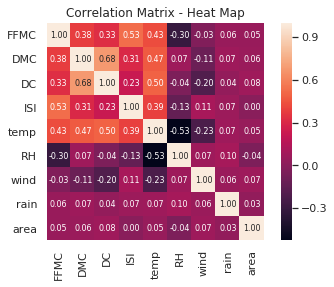

          0         1         2  ...         6         7         8
0  1.000000  0.382619  0.330512  ... -0.028485  0.056702  0.054439
1  0.382619  1.000000  0.682192  ... -0.105342  0.074790  0.060543
2  0.330512  0.682192  1.000000  ... -0.203466  0.035861  0.077276
3  0.531805  0.305128  0.229154  ...  0.106826  0.067668  0.000131
4  0.431532  0.469594  0.496208  ... -0.227116  0.069491  0.047278
5 -0.300995  0.073795 -0.039192  ...  0.069410  0.099751 -0.039474
6 -0.028485 -0.105342 -0.203466  ...  1.000000  0.061119  0.070714
7  0.056702  0.074790  0.035861  ...  0.061119  1.000000  0.031852
8  0.054439  0.060543  0.077276  ...  0.070714  0.031852  1.000000

[9 rows x 9 columns]


In [0]:
cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 
        'rain', 'area']
cor_mat = np.corrcoef(data_norm[cols].values.T)
sns.set(font_scale=1.0)
heat_map = sns.heatmap(cor_mat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 8},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Correlation Matrix - Heat Map')
plt.show()

cor_mat_pd = pd.DataFrame(cor_mat)
print(cor_mat_pd)

Dari Matrix Korelasi diatas, dapat dilihat parameter yang paling berpengaruh adalah:
1. DC (input)
2. Wind (input)
3. FFMC (input)
4. DMC (input)
5. Temperatur (input)
6. Area (output)

Keenam variabel ini akan digunakan untuk dimensi klustering

Objective 3 : Klustering Menggunakan K-means

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Membuat Dataset
data_set = data_norm[['FFMC', 'DMC', 'DC', 'temp', 'wind', 'area']]


#Standarisasi Data
scaler = StandardScaler()
scaler_prep = scaler.fit(data_set)
scaler_result = scaler.transform(data_set)
data_set_standar = pd.DataFrame(scaler_result, columns=['FFMC', 'DMC', 'DC', 'temp', 'wind', 'area'])
#print(data_set_standar.head())


#k-means ( pakai data_set_standar)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_set_standar)
centroids = kmeans.cluster_centers_
hasil_kmeans_int_standar = kmeans.predict(data_set_standar)
hasil_kmeans_int_standar = pd.DataFrame(hasil_kmeans_int_standar, columns=['cluster_int'])
hasil_kmeans_str_standar = pd.cut(hasil_kmeans_int_standar['cluster_int'],3, labels =["Low_risk","Medium_risk","High_risk"])

#data_set_standar tambah kolom hasil k means
data_set_standar = pd.concat([data_set_standar, hasil_kmeans_int_standar, hasil_kmeans_str_standar], axis=1)
data_set_standar.columns = ['FFMC', 'DMC', 'DC', 'temp', 'wind', 'area', 'cluster_int', 'cluster_str']
print(data_set_standar.head())

       FFMC       DMC        DC  ...      area  cluster_int  cluster_str
0 -0.805959 -1.323326 -1.830477  ... -0.964863            0     Low_risk
1 -0.008102 -1.179541  0.488891  ... -0.964863            2    High_risk
2 -0.008102 -1.049822  0.560715  ... -0.964863            2    High_risk
3  0.191362 -1.212361 -1.898266  ... -0.964863            0     Low_risk
4 -0.243833 -0.931043 -1.798600  ... -0.964863            0     Low_risk

[5 rows x 8 columns]


In [0]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)


<Figure size 864x720 with 0 Axes>

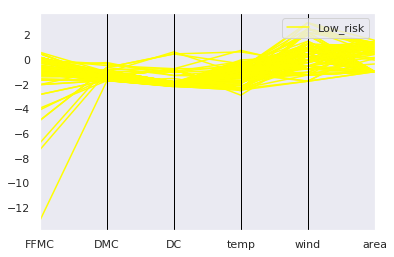

In [0]:
data_standar_parallel_plot_low = data_set_standar[['FFMC', 'DMC', 'DC', 'temp','wind', 'area', 
                                 'cluster_str']].loc[data_set_standar['cluster_str'] == 'Low_risk']

pc_low = parallel_coordinates(data_standar_parallel_plot_low, 
                          'cluster_str', 
                          color=('yellow'))

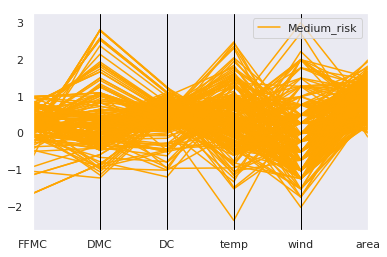

In [0]:
data_standar_parallel_plot_medium = data_set_standar[['FFMC', 'DMC', 'DC', 'temp', 'wind', 'area', 
                                    'cluster_str']].loc[data_set_standar['cluster_str'] == 'Medium_risk']

pc_medium = parallel_coordinates(data_standar_parallel_plot_medium, 
                          'cluster_str', 
                          color=('orange'))

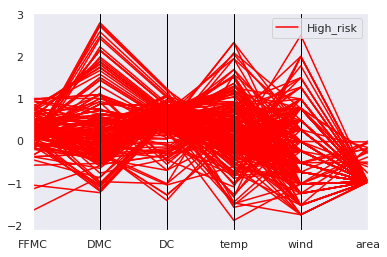

In [0]:
data_standar_parallel_plot_high = data_set_standar[['FFMC', 'DMC', 'DC', 'temp', 'wind', 'area', 
                                  'cluster_str']].loc[data_set_standar['cluster_str'] == 'High_risk']

pc_high = parallel_coordinates(data_standar_parallel_plot_high, 
                          'cluster_str', 
                          color=('red'))

In [0]:
#Membuat Data Frame untuk heatmap tahunan
#join kolom X, Y, month yang tadinya belum digunakan
month = pd.DataFrame(data['month'], columns=['month'])
X = pd.DataFrame(data['X'], columns=['X'])
Y = pd.DataFrame(data['Y'], columns=['Y'])


tabel_vis = data_set_standar.join(month, lsuffix='_0', rsuffix='_1')
tabel_vis = tabel_vis.join(X, lsuffix='_0', rsuffix='_1')
tabel_vis = tabel_vis.join(Y, lsuffix='_0', rsuffix='_1')

#dataframe untuk heatmap bulanan
jan = tabel_vis.loc[data['month'] == 'jan']
feb = tabel_vis.loc[data['month'] == 'feb']
mar = tabel_vis.loc[data['month'] == 'mar']
apr = tabel_vis.loc[data['month'] == 'apr']
mei = tabel_vis.loc[data['month'] == 'may']
jun = tabel_vis.loc[data['month'] == 'jun']
jul = tabel_vis.loc[data['month'] == 'jul']
agt = tabel_vis.loc[data['month'] == 'aug']
sep = tabel_vis.loc[data['month'] == 'sep']
okt = tabel_vis.loc[data['month'] == 'oct']
nov = tabel_vis.loc[data['month'] == 'nov']
des = tabel_vis.loc[data['month'] == 'dec']

print(X)


     X
0    7
1    7
2    7
3    8
4    8
5    8
6    8
7    8
8    8
9    7
10   7
11   7
12   6
13   6
14   6
15   6
16   5
17   8
18   6
19   6
20   6
21   5
22   7
23   7
24   7
25   7
26   7
27   7
28   6
29   6
..  ..
487  5
488  4
489  4
490  4
491  4
492  1
493  1
494  6
495  6
496  4
497  3
498  6
499  7
500  8
501  7
502  4
503  2
504  4
505  1
506  1
507  2
508  1
509  5
510  6
511  8
512  4
513  2
514  7
515  1
516  6

[517 rows x 1 columns]


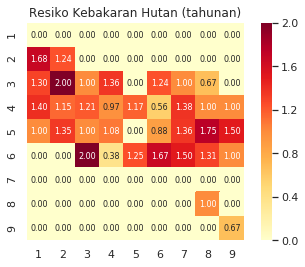

In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(tabel_vis,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi
#perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(tabel_vis['X'].unique(), dtype=int)
X.sort()
Y = np.array(tabel_vis['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat array kosong frame 9x9
i = np.arange(1,10)
tahunan = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",tahunan, "\n")

#update tahunan
tahunan.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",tahunan, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(tahunan,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i)
ax.set_title('Resiko Kebakaran Hutan (tahunan)')
plt.show()

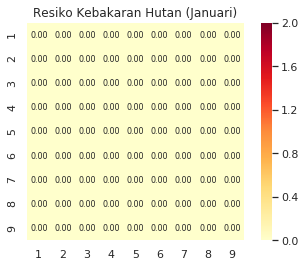

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(jan,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(jan['X'].unique(), dtype=int)
X.sort()
Y = np.array(jan['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
jan_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
jan_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(jan_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Januari)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", jan['cluster_str'].unique())

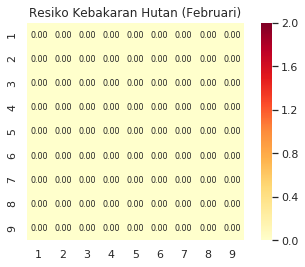

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(feb,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(feb['X'].unique(), dtype=int)
X.sort()
Y = np.array(feb['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
feb_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
feb_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(feb_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Februari)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", feb['cluster_str'].unique())

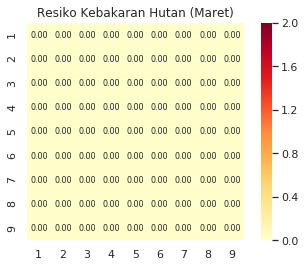

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(mar,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(mar['X'].unique(), dtype=int)
X.sort()
Y = np.array(mar['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
mar_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
mar_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(mar_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Maret)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", mar['cluster_str'].unique())

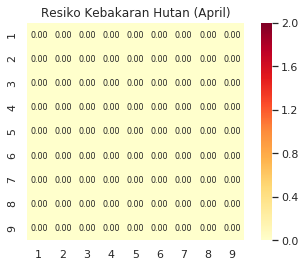

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(apr,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(apr['X'].unique(), dtype=int)
X.sort()
Y = np.array(apr['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
apr_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
apr_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(apr_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (April)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", apr['cluster_str'].unique())

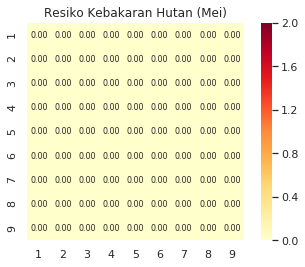

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(mei,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(mei['X'].unique(), dtype=int)
X.sort()
Y = np.array(mei['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
mei_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
mei_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(mei_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Mei)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", mei['cluster_str'].unique())

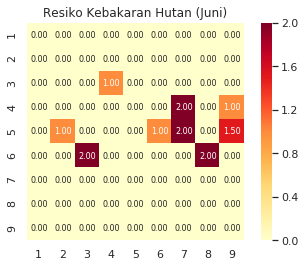

Buat Mengecek nilai unik bulan ini:  [High_risk, Medium_risk, Low_risk]
Categories (3, object): [Low_risk < Medium_risk < High_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(jun,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(jun['X'].unique(), dtype=int)
X.sort()
Y = np.array(jun['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
jun_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
jun_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(jun_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Juni)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", jun['cluster_str'].unique())

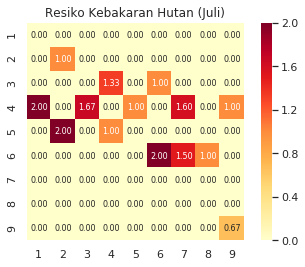

Buat Mengecek nilai unik bulan ini:  [Low_risk, High_risk, Medium_risk]
Categories (3, object): [Low_risk < Medium_risk < High_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(jul,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(jul['X'].unique(), dtype=int)
X.sort()
Y = np.array(jul['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
jul_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
jul_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(jul_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Juli)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", jul['cluster_str'].unique())

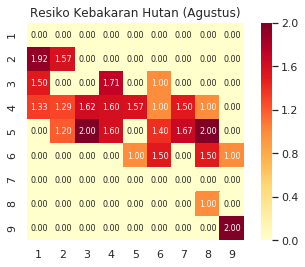

Buat Mengecek nilai unik bulan ini:  [High_risk, Low_risk, Medium_risk]
Categories (3, object): [Low_risk < Medium_risk < High_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(agt,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(agt['X'].unique(), dtype=int)
X.sort()
Y = np.array(agt['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
agt_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
agt_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(agt_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Agustus)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", agt['cluster_str'].unique())

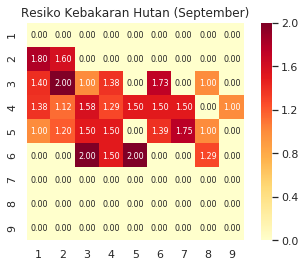

Buat Mengecek nilai unik bulan ini:  [High_risk, Medium_risk, Low_risk]
Categories (3, object): [Low_risk < Medium_risk < High_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(sep,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(sep['X'].unique(), dtype=int)
X.sort()
Y = np.array(sep['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
sep_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
sep_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(sep_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (September)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", sep['cluster_str'].unique())

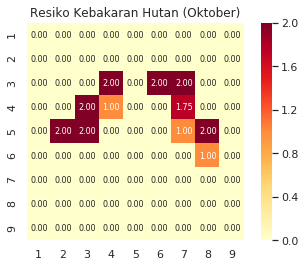

Buat Mengecek nilai unik bulan ini:  [High_risk, Medium_risk]
Categories (2, object): [Medium_risk < High_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(okt,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(okt['X'].unique(), dtype=int)
X.sort()
Y = np.array(okt['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
okt_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
okt_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(okt_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Oktober)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", okt['cluster_str'].unique())

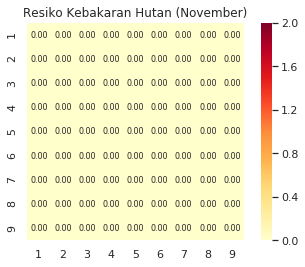

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(nov,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(nov['X'].unique(), dtype=int)
X.sort()
Y = np.array(nov['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
nov_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
nov_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(nov_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (November)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", nov['cluster_str'].unique())

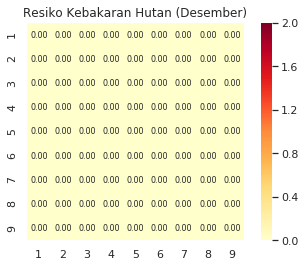

Buat Mengecek nilai unik bulan ini:  [Low_risk]
Categories (1, object): [Low_risk]


In [0]:
#mengaggregasi data
tab_pivot = pd.pivot_table(des,index=["Y"],values=["cluster_int"],
               columns=["X"],aggfunc=[np.mean],fill_value=0)

#menjadikan tab_pivot merupakan dataFrame teragregasi, perlu dikembalikan menjadi data frame biasa
#digunakan numpy array kemudian dikembalikan ke pandas dataframe
X = np.array(des['X'].unique(), dtype=int)
X.sort()
Y = np.array(des['Y'].unique(), dtype=int)
Y.sort()
tab_np = np.array(tab_pivot)
tab_pivot2 = pd.DataFrame(tab_np, columns=X, index=Y)
#print("Buat Data Frame Biasa (bukan format pivot lagi) :\n",tab_pivot2)

#membuat data kosong frame 9x9
i = np.arange(1,10)
des_map = pd.DataFrame(np.zeros([9,9]), columns=i, index=i)
#print("Buat Data Frame Kosongan :\n",jan_map, "\n")

#update tahunan
des_map.update(tab_pivot2)
#print("Kemudian di update dengan pivot 2 :\n",jan_map, "\n")

#Heat Map
ax = plt.axes()
sns.heatmap(des_map,
            cbar=True,
            cmap="YlOrRd",
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=i,
            xticklabels=i,
            vmax=2.0,
            vmin=0.0)
ax.set_title('Resiko Kebakaran Hutan (Desember)')
plt.show()

print("Buat Mengecek nilai unik bulan ini: ", des['cluster_str'].unique())